In [266]:
import zipfile as zip

In [267]:
file = zip.ZipFile('data_session4.zip')

In [268]:
file.extractall()

# Multi-variate linear regression

## 1. Definition and parameter estimation

As we remember linear model between single real-value regressor $x$ and output variable $y$ is expressed by 
$$
y=w_1 x + w_0 +\varepsilon.
$$
$w_1$-slope coefficient, $w_0$ - intercept, $\varepsilon$ - random noise. In a more general case when $x$ is a real-valued $n \times 1$-vector $x=(x_1,x_2,...,x_n)^T$, the model could be easily generalized as
$$
y=\sum\limits_j w_j x_j +\varepsilon
$$
or in a vector form
$$
y=w^T x+\varepsilon, \hspace{5ex} (1)
$$
where $w=(w_1,w_2,...,w_n)$ is also a $n \times 1$-vector. 
Notice that intercept is not specifically separated as it could be always introduced by adding a dummy variable $x^m\equiv 1$.

The probabilistic view on the model in the assumption that $\varepsilon\sim {\cal N}(0,\sigma^2)$ is
$$
p(y|x,w,\sigma)={\cal N}(y|w^T x,\sigma^2).
$$

Given a training set $X=\{(x_j^i), j=1..n, i=1..N\}$, $Y=\{(y^i), i=1..N\}$ (further also denote columns of $X$ as $X_j=\{(x_j^i), i=1..N\}$), the least square optimization criteria for inferring a vector of coefficients $w$ can be written as

$$
RSS(w)= \sum \limits_i \varepsilon_i^2= \sum \limits_i (y^i-w^T x^i)^2. \hspace{5ex} (2)
$$

or in a matrix form:
$$
RSS(w)=(Y-X w)^T(Y-X w).
$$
Then finding an estimate
$$
\hat{w}=argmin_w RSS(w)
$$
can be done by solving the system (in a matrix form)
$$
0=\frac{\partial RSS(\hat{w})}{\partial w}=2X^T (Y-X \hat{w}).
$$
Using matrix formalism the solution could be expressed as
$$
\hat{w}=\left(X^T X\right )^{-1}X^T Y. \hspace{5ex} (3)
$$
This assumes that $X^T X$ is non-singular. Otherwise we have a case of multicollinearity.

## 2. Geometry of Least Squares

According to (3), model estimates $\hat{Y}$ corresponding to the given points in $X$ are
$$
\hat{Y}=X \hat{w}=X(X^T X)^{-1}X^T Y.
$$
This way matrix $H=X(X^T X)^{-1}X^T$ performs an ortogonal projection $HY$ of a given vector of observations $Y$ onto the linear space of all possible linear combinations of columns of $X$.

## 3. Explanations of R-squared

In the same way as for the bi-variate regression:
$$
R^2=1-\frac{RSS}{\sum\limits_i (y_i-\overline{y})^2}=\frac{\sum\limits_i (\hat{y}_i-\overline{y})^2}{\sum\limits_i (y_i-\overline{y})^2},
$$
where $\overline{y}=\sum\limits_i y_i$ is the sample mean of observed values of responce variable. This way $R^2$ is often interpreted as a fraction of responce variable's variance explained by linear model. $R^2=1$ is equivalent to $RSS=0$, i.e. the model fits the observations exactly, i.e. responce variable depends linearly on the explaining variables. On the other hand, $R^2=0$ means that the model always predicts the sample mean $\overline{y}$, i.e. explaining variables $x$ have no effect on responce variable $y$. 

Least-square criteria is equivalent to maximizing $R^2$.

## 4. Feature scaling

Often in order to get some sense out of the values of $w_j$ one might want to normalize the features first, bringing them on the same scale. For example one can standardize, transforming independent variables into their standard scores (also called z-scores, normal scores):
$$
x_j^*=\frac{x_j-\overline{x}_j}{\sigma_j}
$$
where $\overline{x}_j=E[X_j]$ and $\sigma_j=std[X_j]$ are the corresponding sample mean and standard deviation. This however does not apply to a constant dummy variable corresponding to the intercept term if present. One might omit this dummy variable in case if responce variable is also standardized (then it's mean is also zero and there is no need for an intercept). 

Then, the resulting coefficients $\hat{w}_j$ could be interpreted as a relative (or absolute if the output variable is also standardized) strength of each regressor's impact on the responce variable $x_j$.

## 5. Case of orthogonal regressors

Consider a particular case of orthogonal regressors. I.e. suppose that for each pair of $j\neq k$ the inner product equals to zero: $$<X_j,X_k> \quad= \quad X_j^T X_k = \sum\limits_i x_j^i x_k^i=0$$
For the standardized regressors orthogonality is equivalent to being uncorrelated; more generally if at least one of the regressors $x_j$ is standardized (consequently $E[X_j]=0$) then:
$$
0=corr[X_j,X_k]=\frac{Cov[X_j,X_k]}{std[X_j]std[X_k]}=\frac{\frac{<X_j,X_k>}{N}-E[X_j]E[X_k]}{std[X_j]std[X_k]}=\frac{<X_j,X_k>}{N std[X_j]std[X_k]}.
$$
In that case it is possible to show that least square estimate for the multiple regression could be built from a set of univariate regressions of $y$ vs each of the regressors $x_j$ taken separately. Then
$$
\hat{w_j}=\frac{X_j^T Y}{X_j^T X_j}.
$$
If $X_j$ is also standardized, so that $E[X_j]=0$ and $Var[X_j]=1$, the above could be re-written as
$$
\hat{w_j}=Cov[X_j,Y].
$$
Also this way 
$$
Var[Y]=Var[\varepsilon]+\sum_j Var[w_j X_j]=\sigma^2+\sum_j w_j^2.
$$
This gives a very intuitive interpretation of the regression coefficients (or actually their squares) as a **decomposition of the explained part of response variable's variation $Var[Y]-\sigma^2$**. 

However this works only for the basic least-square estimates $w=\hat{w}$, $\sigma=\hat{\sigma}$. While depending on the estimation technique used for $\hat{w}$ and $\hat{\sigma}$ (like using unbiased estimates for example), this equation might only hold approximately.

If $Y$ is also standardized then $\hat{w_j}=corr[X_j,Y]$, i.e. coefficients of such a regression are simply the correlation coefficients of observed sample of responce variable vs each of the regressors. So basically the multivariate regression with ortognal standardized regressors and standardized responce variable could be expressed as
$$
y=\sum\limits_j corr[X_j,Y] x_j+\varepsilon.
$$
This way the regression coefficients are simply the correlations between corresponding regressors and the responce variable's observations.

Although the case of ortogonal (uncorrelated) regressors seems to be quite a special one, during the next session, we'll see that actually every regression could be transformed to such a case through a principle component decomposition.


## 6. Non-linear polynimial regression 

Multi-variate linear regression could be also used in order to fit non-linear models, such as polynomial one for example. If one needs to fit a dependence of 
$$
y=w_mx^m + w_{m-1} x^{m-1} + \ldots + w_1 x + w_0+\epsilon,
$$
one way of doing that it thourgh a multi-variate regression, selecting 
$$
y\sim 1,x,x^2,\ldots,x^{m}
$$ 
as $m+1$ features. Similarly a polinomial form of several variables could be fit, like 
$$
y\sim w_{2,0}x_1^2+w_{1,1}x_1 x_2+w_{2,0}x_2^2+w_{1,0}x_1+w_{0,1}x_2+w_{0,0}
$$
could be handled over a feature space including
$$
y\sim 1,x_1,x_2,x_1^2,x_2^2.
$$

# Lab Session

In [269]:
import numpy as np   # basic numeric module in python, for array and matrix computation
import pandas as pd  # advanced numeric module, excels in data frame analysis
import matplotlib.pyplot as plt  # for data visualization
%pylab inline
# so the plots are embedded in notebook rather than a stand alone window

from mpl_toolkits.mplot3d import Axes3D  # for 3D plot
import statsmodels.formula.api as smf    # for OLS regression

#path = 'https://serv.cusp.nyu.edu/~cq299/ADS2016/Data/'
path=''

Populating the interactive namespace from numpy and matplotlib


In [270]:
data = pd.DataFrame({'a':[1,2,3,4],'b':[2,3,4,5],'c':[3,4,5,6],'d':[123,543,214,435]})

In [271]:
lr = smf.ols(formula='a~b+c+d',data=data).fit()

In [272]:
lr.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                      a   R-squared:                       1.000
Model:                            OLS   Adj. R-squared:                  1.000
Method:                 Least Squares   F-statistic:                 4.777e+26
Date:                Tue, 03 Oct 2017   Prob (F-statistic):           3.24e-14
Time:                        18:13:30   Log-Likelihood:                 118.13
No. Observations:                   4   AIC:                            -230.3
Df Residuals:                       1   BIC:                            -232.1
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept     -1.0000   9.06e-14   -1.1e+13      0.000      -1.000      -1.000
b              1.0000   6.05e-14   1.65e+13      0.000       1.000       1.000
c          -1.166e-15   3.26e-14     -0.036      0.977   -4.16e-13    4.14e-13
d          -1.934e-16   2.36e-16     -0.821      0.562   -3.19e-15     2.8e-15
==============================================================================
Omnibus:                          nan   Durbin-Watson:                   2.430
Prob(Omnibus):                    nan   Jarque-Bera (JB):                0.476
Skew:                          -0.053   Prob(JB):                        0.788
Kurtosis:                       1.314   Cond. No.                     8.27e+17
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The smallest eigenvalue is 7.97e-31. This might indicate that there are
strong multicollinearity problems or that the design matrix is singular.
"""

# Python hints

### Three different ways of selecting data from a data frame DF
* DF.loc[row_label, col_label] $\qquad$ Labels, names, boolean expression etc.
    * Check the zipcode and area of the houses that worth more than 250k: **DF.loc[ DF.price > 250000, ['zipcode','area'] ]**
* DF.iloc[row_index, col_index] $\quad\:\:$ Integer positional access
    * Select all last three columns between row 2 and row 5(inclusive): **DF.iloc[ 2:6 , -3: ]**
* DF.ix[row_index] $\qquad\qquad\quad\:\:$  Primary label-based, but integer works as well
    * Works like the combination of loc and iloc    
* One more thing to care about$\quad\:\:$In expression **x:y** for data selection, the row/column of endpoint **y** would be
    * Excluded if **y** is integer
    * Included if **y** is label

# Example 1, basics
## Try to fit y given $y = w_0 + w_1 x_1 + w_2 x_2 + \epsilon$

In [273]:
data1 = pd.read_csv(path + 'Example1.csv')
data1.head(3)

,x1,x2,y
0,1.964692,-2.138607,-5.605927
1,-2.731485,0.513148,-18.856722
2,2.194690,-0.768935,-6.063095


### (A) Matrix computation
### $$\hat{w}=\left(X^T X\right )^{-1}X^T Y. \hspace{5ex} $$

In [274]:
#Q1. Create a new column x0 for intercept, set the values to 1
data1['x0'] = 1

#Q2. Create X and Y in matrix form then use matrix computation formula to calculate the coefficients
X = np.matrix(data1.loc[:,['x0','x1','x2']])
Y = np.matrix(data1.y).T
w = (X.T * X).I * X.T * Y
print(w)

[[-10.10498527]
 [  2.67679769]
 [ -0.70613511]]


### (B) *statsmodels* module

In [275]:
#Q3. Use statsmodels to regress y over x1 and x2, provide the r-squared and coefficients
lm1 = smf.ols(formula = 'y ~ x1 + x2', data = data1).fit()
print('R2 = %f'%lm1.rsquared)
print(lm1.params)

R2 = 0.776112
Intercept   -10.104985
x1            2.676798
x2           -0.706135
dtype: float64


In [276]:
#Q4. Compare the coefficients obtained through different methods
pd.DataFrame({'Matrix_Computation':w.tolist(), 'Regression':lm1.params})
# First create a dict object, claiming the labels and respective data, then convert it to a data frame

,Matrix_Computation,Regression
Intercept,[-10.1049852733],-10.104985
x1,[2.67679768576],2.676798
x2,[-0.706135109154],-0.706135


In [277]:
#Q5. Extra credit: Find the max/min of each variable and then plot the observation and prediction in 3D plot
data1.describe()

,x1,x2,y,x0
count,20.000000,20.000000,20.000000,20.0
mean,0.027218,-0.075481,-9.978829,1.0
std,2.397628,2.247203,7.251472,0.0
min,-4.078951,-4.403221,-24.968052,1.0
25%,-1.428640,-1.797155,-14.739759,1.0
50%,-0.652825,-0.022391,-9.617834,1.0
75%,2.022191,1.444395,-6.344681,1.0
max,4.807642,3.933892,7.571092,1.0


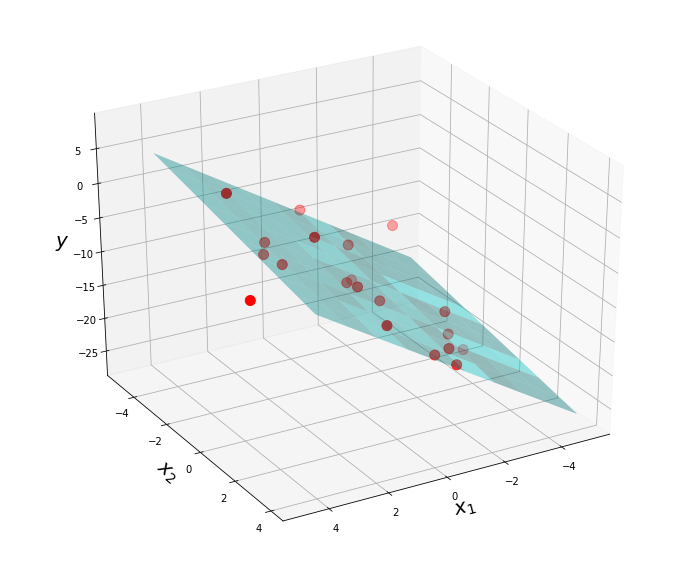

In [278]:
fig = plt.figure(figsize = (12,10))  # Create a plot with customized figure size (width, height)
ax = fig.gca(projection='3d')  # Extract the axis for further operations
ax.scatter(data1.x1, data1.x2, data1.y, s = 100,  c = 'r')
# Scatter plot, "c" stands for color, and "s" determines the marker size

# Generate coordinates for hyperplane
radius = 5
x1, x2 = np.meshgrid(range(-radius,radius), range(-radius,radius))
fit_y = lm1.params[0] + lm1.params[1] * x1 + lm1.params[2] * x2

# alpha (between 0 and 1) controls the transparency with 0 being totally transparent
ax.plot_surface(x1, x2, fit_y, color='c', alpha = 0.4)
# Set labels and fontsize
ax.set_xlabel('$x_1$', fontsize = 20)
ax.set_ylabel('$x_2$', fontsize = 20)
ax.set_zlabel('$y$', fontsize = 20)

ax.view_init(azim = 60)   # Controls the viewing angle

## Example 2. Citi bike trips - model travel time/speed

In [279]:
data2 = pd.read_csv('JC-201609-citibike-tripdata.csv')

In [280]:
data2.head()

,Trip Duration,Start Time,Stop Time,Start Station ID,Start Station Name,Start Station Latitude,Start Station Longitude,End Station ID,End Station Name,End Station Latitude,End Station Longitude,Bike ID,User Type,Birth Year,Gender
0,254,2016-09-01 00:06:09,2016-09-01 00:10:24,3273,Manila & 1st,40.721651,-74.042884,3203,Hamilton Park,40.727596,-74.044247,26157,Subscriber,1989.0,2
1,119,2016-09-01 00:08:04,2016-09-01 00:10:04,3272,Jersey & 3rd,40.723332,-74.045953,3278,Monmouth and 6th,40.725685,-74.048790,24493,Subscriber,1988.0,1
2,425,2016-09-01 00:14:14,2016-09-01 00:21:19,3206,Hilltop,40.731169,-74.057574,3207,Oakland Ave,40.737604,-74.052478,24464,Subscriber,1961.0,1
3,304,2016-09-01 00:15:15,2016-09-01 00:20:20,3220,5 Corners Library,40.734961,-74.059503,3212,Christ Hospital,40.734786,-74.050444,24698,Subscriber,1967.0,1
4,1775,2016-09-01 00:16:37,2016-09-01 00:46:13,3203,Hamilton Park,40.727596,-74.044247,3203,Hamilton Park,40.727596,-74.044247,24626,Subscriber,1984.0,1


#### Q1. Add columns reflecting the day of the week, hour of the day, direct geo-distance between origin and destination and trip density in origin and destination

In [281]:
data2['hour']=pd.DatetimeIndex(data2['Start Time']).hour

In [282]:
data2['weekday']=pd.DatetimeIndex(data2['Start Time']).weekday

In [283]:
from geopy.distance import vincenty

In [284]:
data2['dist']=data2.apply(axis=1,func=lambda x: vincenty((x['Start Station Latitude'],x['Start Station Longitude']),(x['End Station Latitude'],x['End Station Longitude'])).miles)

In [285]:
outdens=data2.groupby(by='Start Station ID').size()

In [286]:
indens=data2.groupby(by='End Station ID').size()

In [287]:
totdens=outdens+indens

In [288]:
data2['StartDens']=data2['Start Station ID'].apply(lambda x:totdens[x])

In [289]:
data2['EndDens']=data2['End Station ID'].apply(lambda x:totdens[x])

#### Q2. Run a regression of trip time against distance. See if doing it on a subset of trips would make more sense

In [290]:
data2.rename(columns = { 'Trip Duration':'duration' }, inplace=True)

In [291]:
lm=smf.ols('duration~dist',data=data2).fit()
lm.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:               duration   R-squared:                       0.000
Model:                            OLS   Adj. R-squared:                  0.000
Method:                 Least Squares   F-statistic:                     2.243
Date:                Tue, 03 Oct 2017   Prob (F-statistic):              0.134
Time:                        18:13:34   Log-Likelihood:            -3.6087e+05
No. Observations:               33425   AIC:                         7.217e+05
Df Residuals:                   33423   BIC:                         7.218e+05
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept    719.2623    110.776      6.493      0.000     502.137     936.388
dist         209.3420    139.785      1.498      0.134     -64.641     483.325
==============================================================================
Omnibus:                   131939.534   Durbin-Watson:                   1.996
Prob(Omnibus):                  0.000   Jarque-Bera (JB):     174129565749.654
Skew:                          98.172   Prob(JB):                         0.00
Kurtosis:                   11182.933   Cond. No.                         3.21
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [292]:
#take only the trips which look like a reasonable commute
comind=data2.duration<data2.dist*1000;

In [293]:
#percentage of such trips
100.0*sum(comind)/len(comind)

80.40688107703815

In [294]:
lm=smf.ols('duration~dist',data=data2.ix[comind]).fit()
lm.summary()

C:\Users\sddz0\Anaconda2\lib\site-packages\ipykernel_launcher.py:1: DeprecationWarning: 
.ix is deprecated. Please use
.loc for label based indexing or
.iloc for positional indexing

See the documentation here:
http://pandas.pydata.org/pandas-docs/stable/indexing.html#ix-indexer-is-deprecated
  """Entry point for launching an IPython kernel.


<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:               duration   R-squared:                       0.810
Model:                            OLS   Adj. R-squared:                  0.810
Method:                 Least Squares   F-statistic:                 1.147e+05
Date:                Tue, 03 Oct 2017   Prob (F-statistic):               0.00
Time:                        18:13:34   Log-Likelihood:            -1.6678e+05
No. Observations:               26876   AIC:                         3.336e+05
Df Residuals:                   26874   BIC:                         3.336e+05
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept     42.6784      1.327     32.154      0.000      40.077      45.280
dist         537.5744      1.587    338.658      0.000     534.463     540.686
==============================================================================
Omnibus:                     5833.792   Durbin-Watson:                   1.806
Prob(Omnibus):                  0.000   Jarque-Bera (JB):            39499.085
Skew:                           0.875   Prob(JB):                         0.00
Kurtosis:                       8.675   Cond. No.                         3.39
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

#### Q3. Add customer demogrphics to the regression. Consider regression for average spead instead

In [295]:
data2['age']=2016-data2['Birth Year']
demoind=(data2['Birth Year']>0)&(data2['Gender']>0)

In [296]:
# run regression agains age and gender (categorical) for trips with specified customer demographics
lm=smf.ols('duration~dist+age+C(Gender)',data=data2.ix[comind&demoind]).fit()
lm.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:               duration   R-squared:                       0.818
Model:                            OLS   Adj. R-squared:                  0.818
Method:                 Least Squares   F-statistic:                 3.822e+04
Date:                Tue, 03 Oct 2017   Prob (F-statistic):               0.00
Time:                        18:13:34   Log-Likelihood:            -1.5786e+05
No. Observations:               25573   AIC:                         3.157e+05
Df Residuals:                   25569   BIC:                         3.158e+05
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
==================================================================================
                     coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------
Intercept         14.2358      3.248      4.382      0.000       7.869      20.603
C(Gender)[T.2]    40.6469      1.742     23.338      0.000      37.233      44.061
dist             535.4293      1.584    338.074      0.000     532.325     538.534
age                0.4755      0.078      6.133      0.000       0.324       0.627
==============================================================================
Omnibus:                     6016.519   Durbin-Watson:                   1.838
Prob(Omnibus):                  0.000   Jarque-Bera (JB):            45261.708
Skew:                           0.930   Prob(JB):                         0.00
Kurtosis:                       9.246   Cond. No.                         174.
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [297]:
#compute average speed
data2['speed']=data2['dist']/data2['duration']

In [298]:
#regress speed against age and demographics
lm=smf.ols('speed~age+C(Gender)',data=data2.ix[comind&demoind]).fit()
lm.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  speed   R-squared:                       0.035
Model:                            OLS   Adj. R-squared:                  0.035
Method:                 Least Squares   F-statistic:                     462.5
Date:                Tue, 03 Oct 2017   Prob (F-statistic):          4.99e-198
Time:                        18:13:34   Log-Likelihood:             1.6256e+05
No. Observations:               25573   AIC:                        -3.251e+05
Df Residuals:                   25570   BIC:                        -3.251e+05
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
==================================================================================
                     coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------
Intercept          0.0019   1.07e-05    175.008      0.000       0.002       0.002
C(Gender)[T.2]    -0.0002   6.29e-06    -29.543      0.000      -0.000      -0.000
age            -2.742e-06    2.8e-07     -9.804      0.000   -3.29e-06   -2.19e-06
==============================================================================
Omnibus:                     1809.063   Durbin-Watson:                   1.864
Prob(Omnibus):                  0.000   Jarque-Bera (JB):             2278.462
Skew:                           0.664   Prob(JB):                         0.00
Kurtosis:                       3.613   Cond. No.                         155.
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

#### Q4. Add time into consideration

In [299]:
#consider weekdays first
lm=smf.ols('speed~age+C(Gender)+C(weekday)',data=data2.ix[comind&demoind]).fit()
lm.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  speed   R-squared:                       0.038
Model:                            OLS   Adj. R-squared:                  0.038
Method:                 Least Squares   F-statistic:                     127.1
Date:                Tue, 03 Oct 2017   Prob (F-statistic):          6.83e-210
Time:                        18:13:35   Log-Likelihood:             1.6261e+05
No. Observations:               25573   AIC:                        -3.252e+05
Df Residuals:                   25564   BIC:                        -3.251e+05
Df Model:                           8                                         
Covariance Type:            nonrobust                                         
===================================================================================
                      coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------
Intercept           0.0019   1.27e-05    147.617      0.000       0.002       0.002
C(Gender)[T.2]     -0.0002   6.28e-06    -29.476      0.000      -0.000      -0.000
C(weekday)[T.1]  1.333e-05   9.88e-06      1.350      0.177   -6.03e-06    3.27e-05
C(weekday)[T.2]  1.483e-05   9.92e-06      1.495      0.135   -4.61e-06    3.43e-05
C(weekday)[T.3]  9.833e-06   9.58e-06      1.026      0.305   -8.95e-06    2.86e-05
C(weekday)[T.4]  7.991e-06   9.79e-06      0.816      0.414   -1.12e-05    2.72e-05
C(weekday)[T.5] -5.016e-05   1.15e-05     -4.358      0.000   -7.27e-05   -2.76e-05
C(weekday)[T.6] -5.752e-05   1.16e-05     -4.946      0.000   -8.03e-05   -3.47e-05
age             -2.832e-06   2.79e-07    -10.136      0.000   -3.38e-06   -2.28e-06
==============================================================================
Omnibus:                     1849.708   Durbin-Watson:                   1.871
Prob(Omnibus):                  0.000   Jarque-Bera (JB):             2343.639
Skew:                           0.671   Prob(JB):                         0.00
Kurtosis:                       3.630   Cond. No.                         306.
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [300]:
lm.params

Intercept          0.001880
C(Gender)[T.2]    -0.000185
C(weekday)[T.1]    0.000013
C(weekday)[T.2]    0.000015
C(weekday)[T.3]    0.000010
C(weekday)[T.4]    0.000008
C(weekday)[T.5]   -0.000050
C(weekday)[T.6]   -0.000058
age               -0.000003
dtype: float64

Basically the only significant effect is observed for weekends. Introduce them as a separate category

In [301]:
data2['wd']=0+(data2['weekday']>=5)

In [302]:
lm=smf.ols('speed~age+C(Gender)+C(wd)',data=data2.ix[comind]).fit()
lm.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  speed   R-squared:                       0.038
Model:                            OLS   Adj. R-squared:                  0.038
Method:                 Least Squares   F-statistic:                     256.7
Date:                Tue, 03 Oct 2017   Prob (F-statistic):          1.18e-216
Time:                        18:13:35   Log-Likelihood:             1.6340e+05
No. Observations:               25695   AIC:                        -3.268e+05
Df Residuals:                   25690   BIC:                        -3.267e+05
Df Model:                           4                                         
Covariance Type:            nonrobust                                         
==================================================================================
                     coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------
Intercept          0.0020    3.9e-05     50.043      0.000       0.002       0.002
C(Gender)[T.1] -6.468e-05   3.81e-05     -1.700      0.089      -0.000    9.91e-06
C(Gender)[T.2]    -0.0002   3.83e-05     -6.512      0.000      -0.000      -0.000
C(wd)[T.1]     -6.435e-05   6.84e-06     -9.409      0.000   -7.78e-05   -5.09e-05
age            -2.825e-06   2.79e-07    -10.131      0.000   -3.37e-06   -2.28e-06
==============================================================================
Omnibus:                     1855.725   Durbin-Watson:                   1.869
Prob(Omnibus):                  0.000   Jarque-Bera (JB):             2350.755
Skew:                           0.671   Prob(JB):                         0.00
Kurtosis:                       3.630   Cond. No.                         947.
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [303]:
data2.ix[comind].groupby(data2.Gender).size()

Gender
0     1303
1    19754
2     5819
dtype: int64

Nearly the same R2 as one gets from detailed information on weekdays 

Now consider hours of the day

In [304]:
lm=smf.ols('speed~age+C(Gender)+C(hour)',data=data2.ix[comind&demoind]).fit()
lm.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  speed   R-squared:                       0.075
Model:                            OLS   Adj. R-squared:                  0.074
Method:                 Least Squares   F-statistic:                     82.48
Date:                Tue, 03 Oct 2017   Prob (F-statistic):               0.00
Time:                        18:13:35   Log-Likelihood:             1.6310e+05
No. Observations:               25573   AIC:                        -3.262e+05
Df Residuals:                   25547   BIC:                        -3.259e+05
Df Model:                          25                                         
Covariance Type:            nonrobust                                         
==================================================================================
                     coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------
Intercept          0.0020   2.76e-05     71.939      0.000       0.002       0.002
C(Gender)[T.2]    -0.0002   6.17e-06    -29.891      0.000      -0.000      -0.000
C(hour)[T.1]   -2.777e-06   4.53e-05     -0.061      0.951   -9.17e-05    8.61e-05
C(hour)[T.2]     1.84e-05    5.1e-05      0.361      0.718   -8.16e-05       0.000
C(hour)[T.3]       0.0002   5.82e-05      3.073      0.002    6.48e-05       0.000
C(hour)[T.4]       0.0003   5.68e-05      5.171      0.000       0.000       0.000
C(hour)[T.5]       0.0002   3.56e-05      4.568      0.000    9.28e-05       0.000
C(hour)[T.6]       0.0001   2.92e-05      4.923      0.000    8.65e-05       0.000
C(hour)[T.7]    3.406e-06   2.73e-05      0.125      0.901      -5e-05    5.69e-05
C(hour)[T.8]   -8.123e-05   2.66e-05     -3.053      0.002      -0.000   -2.91e-05
C(hour)[T.9]   -7.775e-05   2.75e-05     -2.825      0.005      -0.000   -2.38e-05
C(hour)[T.10]  -7.586e-05    2.9e-05     -2.616      0.009      -0.000    -1.9e-05
C(hour)[T.11]     -0.0001   2.91e-05     -4.227      0.000      -0.000   -6.59e-05
C(hour)[T.12]     -0.0002   2.89e-05     -5.443      0.000      -0.000      -0.000
C(hour)[T.13]     -0.0001   2.91e-05     -5.137      0.000      -0.000   -9.25e-05
C(hour)[T.14]     -0.0002   2.92e-05     -5.407      0.000      -0.000      -0.000
C(hour)[T.15]     -0.0002   2.92e-05     -5.385      0.000      -0.000      -0.000
C(hour)[T.16]     -0.0002   2.82e-05     -5.759      0.000      -0.000      -0.000
C(hour)[T.17]     -0.0002   2.71e-05     -6.275      0.000      -0.000      -0.000
C(hour)[T.18]     -0.0002   2.69e-05     -6.807      0.000      -0.000      -0.000
C(hour)[T.19]     -0.0002   2.73e-05     -7.147      0.000      -0.000      -0.000
C(hour)[T.20]     -0.0002   2.79e-05     -5.898      0.000      -0.000      -0.000
C(hour)[T.21]     -0.0002   2.89e-05     -6.012      0.000      -0.000      -0.000
C(hour)[T.22]     -0.0001   3.03e-05     -4.388      0.000      -0.000   -7.35e-05
C(hour)[T.23]    -5.4e-05   3.29e-05     -1.642      0.101      -0.000    1.04e-05
age            -2.762e-06   2.75e-07    -10.046      0.000    -3.3e-06   -2.22e-06
==============================================================================
Omnibus:                     1836.319   Durbin-Watson:                   1.944
Prob(Omnibus):                  0.000   Jarque-Bera (JB):             2347.572
Skew:                           0.661   Prob(JB):                         0.00
Kurtosis:                       3.675   Cond. No.                     1.87e+03
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 1.87e+03. This might indicate that there are
strong multicolline

One can generally recognize five periods in the day - morning (7-10am, day-11am-5pm, evening-6-10pm, late evening-11pm-1am and night-2am-6am)

In [305]:
#Are weekends different?
lm=smf.ols('speed~age+C(Gender)+C(hour)',data=data2.ix[comind&demoind&(data2.wd==1)]).fit()
lm.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  speed   R-squared:                       0.068
Model:                            OLS   Adj. R-squared:                  0.063
Method:                 Least Squares   F-statistic:                     13.24
Date:                Tue, 03 Oct 2017   Prob (F-statistic):           5.28e-53
Time:                        18:13:35   Log-Likelihood:                 28891.
No. Observations:                4543   AIC:                        -5.773e+04
Df Residuals:                    4517   BIC:                        -5.756e+04
Df Model:                          25                                         
Covariance Type:            nonrobust                                         
==================================================================================
                     coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------
Intercept          0.0019   4.86e-05     38.929      0.000       0.002       0.002
C(Gender)[T.2]    -0.0002   1.47e-05    -10.325      0.000      -0.000      -0.000
C(hour)[T.1]   -8.951e-06   6.96e-05     -0.129      0.898      -0.000       0.000
C(hour)[T.2]    3.823e-06   7.68e-05      0.050      0.960      -0.000       0.000
C(hour)[T.3]       0.0002   8.77e-05      1.831      0.067   -1.14e-05       0.000
C(hour)[T.4]    9.911e-05      0.000      0.851      0.395      -0.000       0.000
C(hour)[T.5]       0.0003      0.000      3.281      0.001       0.000       0.001
C(hour)[T.6]       0.0003   7.35e-05      4.121      0.000       0.000       0.000
C(hour)[T.7]       0.0001   5.76e-05      1.994      0.046    1.93e-06       0.000
C(hour)[T.8]       0.0001   5.12e-05      2.103      0.036    7.29e-06       0.000
C(hour)[T.9]    1.396e-05   4.98e-05      0.280      0.779   -8.36e-05       0.000
C(hour)[T.10]  -8.007e-05   4.89e-05     -1.636      0.102      -0.000    1.59e-05
C(hour)[T.11]  -8.329e-05   4.79e-05     -1.739      0.082      -0.000    1.06e-05
C(hour)[T.12]  -9.698e-05   4.81e-05     -2.015      0.044      -0.000   -2.62e-06
C(hour)[T.13]     -0.0001   4.89e-05     -2.348      0.019      -0.000   -1.89e-05
C(hour)[T.14]     -0.0001    4.9e-05     -2.486      0.013      -0.000   -2.58e-05
C(hour)[T.15]     -0.0001   4.96e-05     -2.589      0.010      -0.000   -3.12e-05
C(hour)[T.16]     -0.0002   4.92e-05     -3.286      0.001      -0.000   -6.53e-05
C(hour)[T.17]     -0.0002   4.91e-05     -3.227      0.001      -0.000   -6.22e-05
C(hour)[T.18]     -0.0001   4.86e-05     -2.977      0.003      -0.000   -4.94e-05
C(hour)[T.19]     -0.0001   5.01e-05     -2.931      0.003      -0.000   -4.86e-05
C(hour)[T.20]     -0.0001   5.03e-05     -2.677      0.007      -0.000    -3.6e-05
C(hour)[T.21]     -0.0001   5.45e-05     -2.141      0.032      -0.000   -9.82e-06
C(hour)[T.22]  -7.788e-05   5.45e-05     -1.428      0.153      -0.000    2.91e-05
C(hour)[T.23]  -5.755e-05   5.85e-05     -0.984      0.325      -0.000    5.71e-05
age            -2.648e-06   6.53e-07     -4.052      0.000   -3.93e-06   -1.37e-06
==============================================================================
Omnibus:                      373.391   Durbin-Watson:                   1.936
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              476.232
Skew:                           0.735   Prob(JB):                    3.87e-104
Kurtosis:                       3.595   Cond. No.                     1.27e+03
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 1.27e+03. This might indicate that there are
strong multicolline

Similar pattern athough a bit shifted in time

Run a regression using both - wd and hour

In [306]:
lm=smf.ols('speed~age+C(Gender)+C(wd)+C(hour)',data=data2.ix[comind&demoind]).fit()
lm.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  speed   R-squared:                       0.077
Model:                            OLS   Adj. R-squared:                  0.076
Method:                 Least Squares   F-statistic:                     81.73
Date:                Tue, 03 Oct 2017   Prob (F-statistic):               0.00
Time:                        18:13:36   Log-Likelihood:             1.6313e+05
No. Observations:               25573   AIC:                        -3.262e+05
Df Residuals:                   25546   BIC:                        -3.260e+05
Df Model:                          26                                         
Covariance Type:            nonrobust                                         
==================================================================================
                     coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------
Intercept          0.0020   2.78e-05     72.421      0.000       0.002       0.002
C(Gender)[T.2]    -0.0002   6.17e-06    -29.851      0.000      -0.000      -0.000
C(wd)[T.1]     -5.351e-05   7.02e-06     -7.625      0.000   -6.73e-05   -3.98e-05
C(hour)[T.1]    2.331e-06   4.53e-05      0.051      0.959   -8.65e-05    9.11e-05
C(hour)[T.2]    2.435e-05    5.1e-05      0.478      0.633   -7.55e-05       0.000
C(hour)[T.3]       0.0002   5.81e-05      3.166      0.002    7.01e-05       0.000
C(hour)[T.4]       0.0003   5.67e-05      5.026      0.000       0.000       0.000
C(hour)[T.5]       0.0001   3.56e-05      4.093      0.000     7.6e-05       0.000
C(hour)[T.6]       0.0001   2.93e-05      4.321      0.000    6.91e-05       0.000
C(hour)[T.7]   -1.389e-05   2.73e-05     -0.508      0.611   -6.75e-05    3.97e-05
C(hour)[T.8]   -9.832e-05   2.67e-05     -3.686      0.000      -0.000    -4.6e-05
C(hour)[T.9]   -9.009e-05   2.75e-05     -3.271      0.001      -0.000   -3.61e-05
C(hour)[T.10]  -7.914e-05    2.9e-05     -2.732      0.006      -0.000   -2.24e-05
C(hour)[T.11]     -0.0001   2.91e-05     -4.204      0.000      -0.000   -6.52e-05
C(hour)[T.12]     -0.0002   2.89e-05     -5.489      0.000      -0.000      -0.000
C(hour)[T.13]     -0.0002   2.91e-05     -5.231      0.000      -0.000   -9.51e-05
C(hour)[T.14]     -0.0002   2.91e-05     -5.503      0.000      -0.000      -0.000
C(hour)[T.15]     -0.0002   2.92e-05     -5.526      0.000      -0.000      -0.000
C(hour)[T.16]     -0.0002   2.82e-05     -6.048      0.000      -0.000      -0.000
C(hour)[T.17]     -0.0002   2.71e-05     -6.767      0.000      -0.000      -0.000
C(hour)[T.18]     -0.0002   2.69e-05     -7.319      0.000      -0.000      -0.000
C(hour)[T.19]     -0.0002   2.74e-05     -7.633      0.000      -0.000      -0.000
C(hour)[T.20]     -0.0002    2.8e-05     -6.295      0.000      -0.000      -0.000
C(hour)[T.21]     -0.0002   2.89e-05     -6.428      0.000      -0.000      -0.000
C(hour)[T.22]     -0.0001   3.03e-05     -4.665      0.000      -0.000   -8.19e-05
C(hour)[T.23]  -5.998e-05   3.29e-05     -1.826      0.068      -0.000    4.42e-06
age            -2.842e-06   2.75e-07    -10.341      0.000   -3.38e-06    -2.3e-06
==============================================================================
Omnibus:                     1854.022   Durbin-Watson:                   1.948
Prob(Omnibus):                  0.000   Jarque-Bera (JB):             2376.527
Skew:                           0.664   Prob(JB):                         0.00
Kurtosis:                       3.682   Cond. No.                     1.87e+03
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The conditio

Finally add density parameters for beginning and the end of the trip

In [307]:
lm=smf.ols('speed~age+C(Gender)+C(wd)+C(hour)+StartDens+EndDens',data=data2.ix[comind&demoind]).fit()
lm.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  speed   R-squared:                       0.081
Model:                            OLS   Adj. R-squared:                  0.080
Method:                 Least Squares   F-statistic:                     80.40
Date:                Tue, 03 Oct 2017   Prob (F-statistic):               0.00
Time:                        18:13:36   Log-Likelihood:             1.6316e+05
No. Observations:               25568   AIC:                        -3.263e+05
Df Residuals:                   25539   BIC:                        -3.260e+05
Df Model:                          28                                         
Covariance Type:            nonrobust                                         
==================================================================================
                     coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------
Intercept          0.0020    2.8e-05     71.946      0.000       0.002       0.002
C(Gender)[T.2]    -0.0002   6.16e-06    -30.076      0.000      -0.000      -0.000
C(wd)[T.1]     -5.382e-05   7.03e-06     -7.657      0.000   -6.76e-05      -4e-05
C(hour)[T.1]   -2.754e-06   4.52e-05     -0.061      0.951   -9.14e-05    8.58e-05
C(hour)[T.2]     2.34e-05   5.09e-05      0.460      0.645   -7.63e-05       0.000
C(hour)[T.3]       0.0002   5.81e-05      2.642      0.008    3.96e-05       0.000
C(hour)[T.4]       0.0003   5.66e-05      4.597      0.000       0.000       0.000
C(hour)[T.5]       0.0001   3.57e-05      3.071      0.002    3.96e-05       0.000
C(hour)[T.6]    8.492e-05   2.95e-05      2.883      0.004    2.72e-05       0.000
C(hour)[T.7]   -5.236e-05   2.75e-05     -1.903      0.057      -0.000    1.57e-06
C(hour)[T.8]      -0.0001   2.69e-05     -5.093      0.000      -0.000   -8.41e-05
C(hour)[T.9]      -0.0001   2.77e-05     -4.502      0.000      -0.000   -7.04e-05
C(hour)[T.10]     -0.0001    2.9e-05     -3.668      0.000      -0.000   -4.96e-05
C(hour)[T.11]     -0.0001   2.91e-05     -4.917      0.000      -0.000   -8.59e-05
C(hour)[T.12]     -0.0002   2.89e-05     -6.062      0.000      -0.000      -0.000
C(hour)[T.13]     -0.0002    2.9e-05     -5.795      0.000      -0.000      -0.000
C(hour)[T.14]     -0.0002   2.91e-05     -5.933      0.000      -0.000      -0.000
C(hour)[T.15]     -0.0002   2.91e-05     -5.942      0.000      -0.000      -0.000
C(hour)[T.16]     -0.0002   2.82e-05     -6.285      0.000      -0.000      -0.000
C(hour)[T.17]     -0.0002   2.71e-05     -6.775      0.000      -0.000      -0.000
C(hour)[T.18]     -0.0002   2.69e-05     -7.333      0.000      -0.000      -0.000
C(hour)[T.19]     -0.0002   2.73e-05     -7.739      0.000      -0.000      -0.000
C(hour)[T.20]     -0.0002   2.79e-05     -6.348      0.000      -0.000      -0.000
C(hour)[T.21]     -0.0002   2.89e-05     -6.429      0.000      -0.000      -0.000
C(hour)[T.22]     -0.0001   3.02e-05     -4.759      0.000      -0.000   -8.45e-05
C(hour)[T.23]  -6.501e-05   3.28e-05     -1.983      0.047      -0.000   -7.55e-07
age            -2.883e-06   2.75e-07    -10.497      0.000   -3.42e-06   -2.34e-06
StartDens      -5.211e-09   1.06e-09     -4.918      0.000   -7.29e-09   -3.13e-09
EndDens         9.006e-09   1.01e-09      8.894      0.000    7.02e-09     1.1e-08
==============================================================================
Omnibus:                     1822.818   Durbin-Watson:                   1.945
Prob(Omnibus):                  0.000   Jarque-Bera (JB):             2322.245
Skew:                           0.660   Prob(JB):                         0.00
Kurtosis:                       3.663   Cond. No.                     2.69e+05
================================

Now split the dataset, train the model over one half and apply to the other

In [308]:
np.random.seed(101)
from sklearn.model_selection import train_test_split
datatrain, datatest = train_test_split(data2.ix[comind&demoind], test_size=0.5)

In [309]:
lm1=smf.ols(formula='speed~age+Gender+wd+StartDens+EndDens',data=datatrain).fit()
lm1.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  speed   R-squared:                       0.051
Model:                            OLS   Adj. R-squared:                  0.051
Method:                 Least Squares   F-statistic:                     138.2
Date:                Tue, 03 Oct 2017   Prob (F-statistic):          3.28e-143
Time:                        18:13:36   Log-Likelihood:                 81344.
No. Observations:               12784   AIC:                        -1.627e+05
Df Residuals:                   12778   BIC:                        -1.626e+05
Df Model:                           5                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept      0.0020   2.03e-05     99.325      0.000       0.002       0.002
age        -2.155e-06   3.95e-07     -5.460      0.000   -2.93e-06   -1.38e-06
Gender        -0.0002   8.89e-06    -20.201      0.000      -0.000      -0.000
wd          -5.62e-05   9.62e-06     -5.842      0.000   -7.51e-05   -3.73e-05
StartDens  -8.915e-09   1.47e-09     -6.053      0.000   -1.18e-08   -6.03e-09
EndDens     1.622e-08   1.34e-09     12.077      0.000    1.36e-08    1.89e-08
==============================================================================
Omnibus:                      986.729   Durbin-Watson:                   1.987
Prob(Omnibus):                  0.000   Jarque-Bera (JB):             1284.755
Skew:                           0.686   Prob(JB):                    1.04e-279
Kurtosis:                       3.727   Cond. No.                     3.05e+04
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 3.05e+04. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [310]:
lm1.params

Intercept    2.011457e-03
age         -2.155267e-06
Gender      -1.796029e-04
wd          -5.619647e-05
StartDens   -8.915142e-09
EndDens      1.622265e-08
dtype: float64

In [311]:
predictSpeed=lm1.params.Intercept+lm1.params.age*datatest.age+lm1.params.Gender*datatest.Gender+lm1.params.wd*datatest.wd+lm1.params.StartDens*datatest.StartDens+lm1.params.EndDens*datatest.EndDens

In [312]:
R2 = 1 - sum((datatest.speed-predictSpeed)**2) / sum((datatest.speed-mean(datatest.speed))**2)
R2

0.05675749216356196

## Example 3, Polynomial fit

### Given two columns of data, $y$ and $x$, we want to fit it with a polynomial and find the coefficients $w$ $$\hat y(x,w) = \sum\limits_{i=0}^M w_i\cdot x^i$$
### Which M gives the best fit?

In [313]:
data3 = pd.read_csv(path + 'Example3.csv')
data3

,y,x
0,-8.256892,-2.000000
1,4.732777,-1.333333
2,3.997084,-0.666667
3,-3.518884,0.000000
4,-4.661727,0.666667
5,-1.897542,1.333333
6,-16.280038,2.000000
7,-8.879330,2.666667
8,2.945957,3.333333
9,10.399779,4.000000


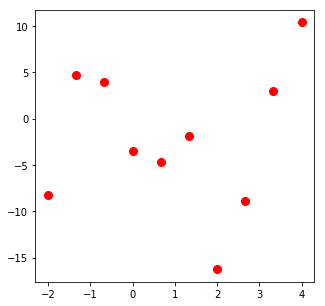

In [314]:
plt.figure(figsize = (5,5))
plt.plot(data3.x, data3.y, 'ro', markersize = 8)

In [315]:
# First try linear regression and check the R2
(smf.ols(formula = 'y ~ x', data = data3).fit()).rsquared

0.016695221729687293

In [316]:
# linear regression (M=1) does not seem to make much sense

In [317]:
#Q1. Create a new data frame, containing all x^j from x^1 up to x^9

In [318]:
#Q2. As degree M increases from 1 to 9, fit y with M-degree polynomial and find the corresponding parameters and R^2
    # Store them separately

In [319]:
#Q3. Plot the R^2, see how it changes as M goes up

In [320]:
#Q4. Visualize the dataset:
    #Q 4.1 Generate a plot with 3-by-3 subfigure, each containing a model with M-degree polynomial (from 1 to 9)
    #Q 4.2 In each subfigure, plot the observations and the fitted curve of polynomial
    #Q 4.3 In each subfigure, plot the function f(x) = x**3 - 2*x**2 - 5*x + 1, see how it looks

In [321]:
#Q1. First create a new data frame, containing all x^j from x^1 up to x^9

In [322]:
data3 = pd.DataFrame([data3.y]  # Use the list property that they can be concatenated by "+"
            + [np.array(data3.x**(i+1)) for i in range(9)]).T # Generate all x^j, then stack them
data3.columns = ['y']+['x%d'%(i+1) for i in range(9)]   # Rename the columns for better understanding
data3

,y,x1,x2,x3,x4,x5,x6,x7,x8,x9
0,-8.256892,-2.000000,4.000000,-8.000000,16.000000,-32.000000,64.000000,-128.000000,256.000000,-512.000000
1,4.732777,-1.333333,1.777778,-2.370370,3.160494,-4.213992,5.618656,-7.491541,9.988721,-13.318295
2,3.997084,-0.666667,0.444444,-0.296296,0.197531,-0.131687,0.087791,-0.058528,0.039018,-0.026012
3,-3.518884,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
4,-4.661727,0.666667,0.444444,0.296296,0.197531,0.131687,0.087791,0.058528,0.039018,0.026012
5,-1.897542,1.333333,1.777778,2.370370,3.160494,4.213992,5.618656,7.491541,9.988721,13.318295
6,-16.280038,2.000000,4.000000,8.000000,16.000000,32.000000,64.000000,128.000000,256.000000,512.000000
7,-8.879330,2.666667,7.111111,18.962963,50.567901,134.847737,359.593964,958.917238,2557.112635,6818.967027
8,2.945957,3.333333,11.111111,37.037037,123.456790,411.522634,1371.742112,4572.473708,15241.579027,50805.263425
9,10.399779,4.000000,16.000000,64.000000,256.000000,1024.000000,4096.000000,16384.000000,65536.000000,262144.000000


In [323]:
#Q2. As degree M increases from 1 to 9, fit y with M-degree polynomial and find the corresponding parameters and R^2
    # Store them separately

In [324]:
def MultiReg(data, degree):
    # First create a string for controlling the number of x_i
    string = ''
    for i in range(degree):
        string += str(i+1)  # For example, if degree == 3, then this string would be '123' at the end
    formula = 'y ~ x' + ' + x'.join(string) # join function will convert '123' to '1 + x2 + x3'
    print(formula)

    # Perform regression and return the results
    lm = smf.ols(formula = formula, data = data).fit()
    return lm.rsquared, lm.params


# Run the function and store the results separately
R2 = []; Params = []
for M in range(1,10):
    a,b = MultiReg(data3,M)  # For each M, run the function
    R2.append(a)
    Params.append(b)
R2

y ~ x1
y ~ x1 + x2
y ~ x1 + x2 + x3
y ~ x1 + x2 + x3 + x4
y ~ x1 + x2 + x3 + x4 + x5
y ~ x1 + x2 + x3 + x4 + x5 + x6
y ~ x1 + x2 + x3 + x4 + x5 + x6 + x7
y ~ x1 + x2 + x3 + x4 + x5 + x6 + x7 + x8
y ~ x1 + x2 + x3 + x4 + x5 + x6 + x7 + x8 + x9


[0.016695221729687293,
 0.20770639221492682,
 0.75592879017667158,
 0.78753924885767013,
 0.78753944371387807,
 0.8886700019662257,
 0.90246297972879819,
 0.96384252460820874,
 1.0]

In [325]:
#Q3. Plot the R^2, see how it changes as M goes up

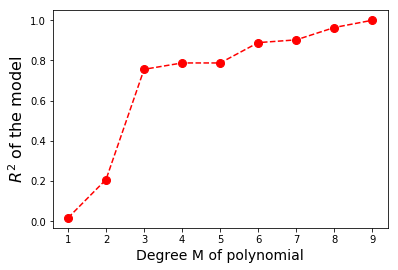

In [326]:
#Q3 See how $R^2$ increases as the degree of polynomial increases 
plt.plot(range(1,10),R2,'ro--', markersize = 8)
plt.xlabel('Degree M of polynomial', fontsize = 14)
plt.ylabel('$R^2$ of the model', fontsize = 16)
plt.show()

In [327]:
# For those who are interested, this is how the data was generated:

# np.random.seed(123)        # Please use the same seed if you want to obtain identical plots as above
# x = np.linspace(-2,4,10)
# eps = np.random.normal(0,3,10)
# f = lambda x: x**3 - 2*x**2 - 5*x + 1
# y = f(x) + eps

# data3 = pd.DataFrame([y]+[x**(i+1) for i in range(9)]).T
# data3.columns = ['y']+['x%d'%(i+1) for i in range(9)]

### Finally we plot everything together, compared to the true function used to generate the data, now given as
$$ f(x) = x^3 - 2x^2 - 5 + 1$$
* <font color='red'>Red</font>  dots are our observations
* <font color='green'>Green</font> curve is the true function
* <font color='blue'>Blue</font> dashed line is our fitted curve
* Two stars $\star$ are for comparison--how well our model fits the actual value

In [328]:
#Q4. Visualize the dataset:
    #Q 4.1 Generate a plot with 3-by-3 subfigure, each containing a model with M-degree polynomial (from 1 to 9)
    #Q 4.2 In each subfigure, plot the observations and the fitted curve of polynomial
    #Q 4.3 In each subfigure, plot the function x**3 - 2*x**2 - 5*x + 1, see how it looks

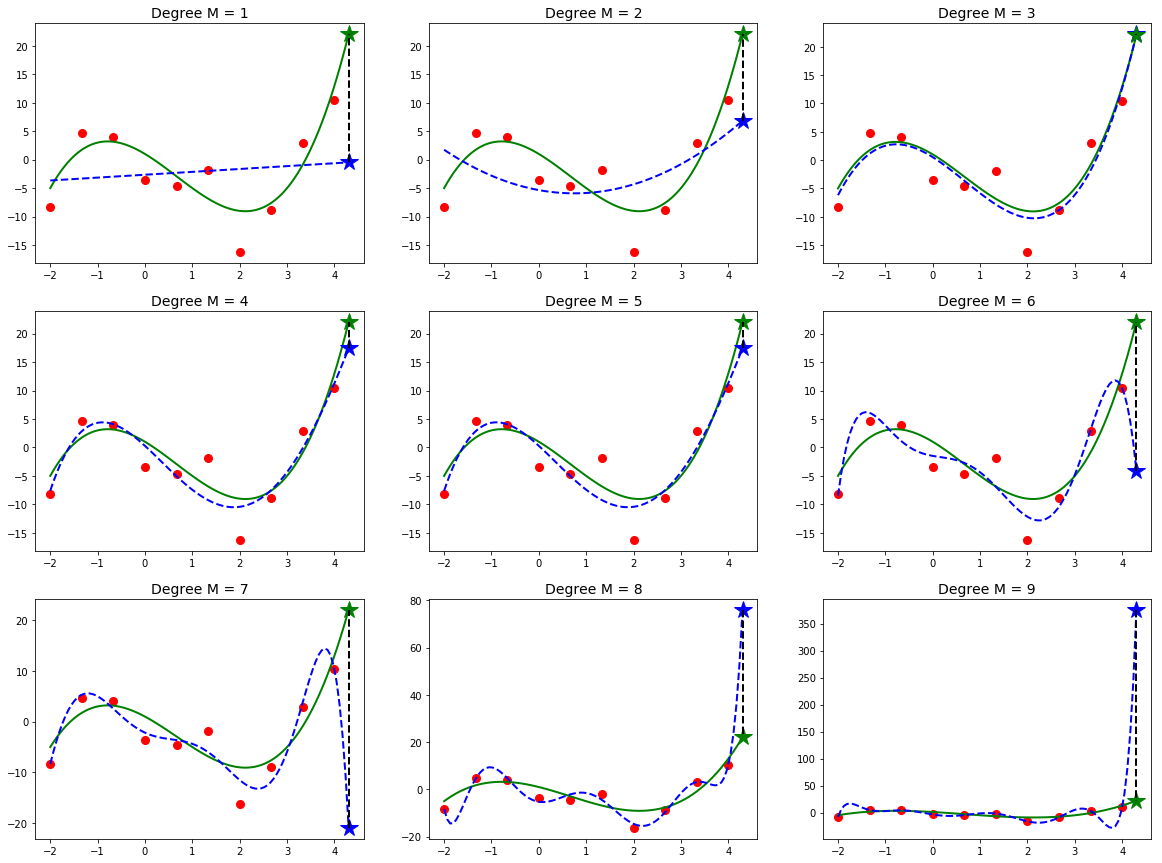

In [329]:
plt.figure(figsize = (20,15))

f = lambda x: x**3 - 2*x**2 - 5*x + 1

for M in range(1,10):
    plt.subplot(330+M)   # Plot subfigure, M controls the location
    x_fit = np.linspace(-2,4.3,100)  # For smoothing the fitted curve
    y_fit = pd.DataFrame(np.matrix([x_fit**k for k in range(M+1)]).T,  # Generate our fitted curve
                         columns = Params[M-1].index).mul(Params[M-1], 1).sum(1)  # 1 means computation runs row-wise
    # Pay attention how we obtain the results by controlling the axes on which the operations are performed

    y_future = 0
    x_future = 4.3
    for i in range(len(Params[M-1])):
        y_future += Params[M-1][i] * (x_future**i)
    plt.plot(data3.x1, data3.y, 'ro', markersize = 8)    # Red dots, the observations
    plt.plot(x_fit, f(x_fit), 'g-', lw = 2)              # Green curve, the actual function f defined before
    plt.plot(x_fit, y_fit, 'b--', lw = 2)                # Blue dashed line, our fitted curve
    plt.plot(x_future, y_future, 'b*', markersize = 18)        # Blue star, fitted value
    plt.plot(x_future, f(x_future), 'g*', markersize = 18)     # Green star, true value
    plt.plot([x_future,x_future], [y_future, f(x_future)], 'k--', lw = 2)
    plt.title('Degree M = %d'%(M), fontsize = 14)

## Example 4. Income vs Education in NYC zip code areas

Model average income per capita against percentages of individuals of different education level within the area

### Memo:
* **IncomePerCapita**----measured in USD
* **PopOver25** et al----population number under each category, e.g.
    * total population over 25 years old
    * holding a Bachelor's degree
    * graduating from professional school, etc.

In [330]:
data4 = pd.read_csv(path + 'IncomeEduReg.csv')
data4.head()

,Zipcode,IncomePerCapita,PopOver25,LessThanHS,HighSchool,SomeCollege,Bachelor,Master,Doctorate,ProfSchool
0,10001,77512.0,16328,1389,1665,2075,6061,3412,519,1207
1,10002,26905.0,60932,21170,12718,8532,12721,4001,641,1149
2,10003,79088.0,41182,1499,2810,4516,17958,9094,1626,3679
3,10004,98020.0,2279,29,87,305,984,550,86,238
4,10005,99633.0,5954,133,103,454,2745,1637,219,663


Starting from now we denote Income per capita by IPC:
$$IPC = \frac{Total \: Income}{Total \: Population}$$
But Total Income can be calculated as
$$ Total\: Income = \sum_k Total \: Income \:in\: Category_k$$
$$ = \sum_k (IPC \: within \: Category_k  \times Population \: of\: Category_k)$$
Then, IPC can be rewritten as
$$ \sum_k (IPC \: within \: Category_k  \times \frac{Population \: of\: Category_k}{Total \: Population})$$

$$= \sum_{k} (I_k \times p_k)$$

where k is the category index, $I_k$ is the average income within category k, and $p_k$ is the population percentage of category k.  
Our goal is to fit these $I_k$ as regression coefficients, note that since all these percentages sum up to 100%, we can omit one last $p_k$ and rewrite this term as 1 minus the rest. For example, if there are 3 categories in total, we have:
$$p_1 + p_2 + p_3 = 1$$which means$$p_3 = 1 - p_1 - p_2$$
Hence  $$IPC = I_1p_1 + I_2p_2 + I_3p_3$$ $$= I_1p_1 + I_2p_2 + I_3(1 - p_1 -p_2)$$ $$= I_3 + (I_1 - I_3)p_1 + (I_2 - I_3)p_2$$
which means we are equivalently fitting $I_3, (I_1 - I_3), (I_2 - I_3)$ rather than $I_1, I_3, I_3$, this is also where the intercept ($I_3$) comes from.

#### Q1. Load data, verify that, in each zip code, "PopOver25" is indeed the sum of all other population categories

#### Q2. Perform the regression of income per capita version education distribution
    Q2.1. For that purpise convert the population counts in each education category into percentages of all people with such education. Make sure there is no NaN (Not a number) or 0 in the denominator before converting population into percentage. Divide each column by the total population "PopOver25". Leave the result in form of 58(%) rather than 0.58
    Q2.2. Run the regression of IncomePerCaputa ~ HighSchool + SomeCollege + Bachelor + Master + Doctorate + ProfSchool (below HS is left out as a linear combination of others)
    Q.2.3. Diagnose multicollinearity by looking at the correlations between regressors

In [347]:
data4 = data4.dropna(0,how='any')
data4 = data4[(data4 != 0).all(axis=1)]

In [332]:
data4.head()

,Zipcode,IncomePerCapita,PopOver25,LessThanHS,HighSchool,SomeCollege,Bachelor,Master,Doctorate,ProfSchool
0,10001,77512.0,16328,1389,1665,2075,6061,3412,519,1207
1,10002,26905.0,60932,21170,12718,8532,12721,4001,641,1149
2,10003,79088.0,41182,1499,2810,4516,17958,9094,1626,3679
3,10004,98020.0,2279,29,87,305,984,550,86,238
4,10005,99633.0,5954,133,103,454,2745,1637,219,663


In [333]:
for i in range(3,len(data4.columns)):
    data4.iloc[:,i] = data4.iloc[:,i]/data4.iloc[:,2] * 100

In [335]:
data4.head()

,Zipcode,IncomePerCapita,PopOver25,LessThanHS,HighSchool,SomeCollege,Bachelor,Master,Doctorate,ProfSchool
0,10001,77512.0,16328,8.506859,10.197207,12.708231,37.120284,20.896619,3.178589,7.392210
1,10002,26905.0,60932,34.743649,20.872448,14.002495,20.877371,6.566336,1.051992,1.885709
2,10003,79088.0,41182,3.639940,6.823369,10.965956,43.606430,22.082463,3.948327,8.933515
3,10004,98020.0,2279,1.272488,3.817464,13.383063,43.176832,24.133392,3.773585,10.443177
4,10005,99633.0,5954,2.233792,1.729929,7.625126,46.103460,27.494122,3.678200,11.135371


In [337]:
lr = smf.ols(formula='IncomePerCapita ~ HighSchool + SomeCollege + Bachelor + Master + Doctorate + ProfSchool',data=data4).fit()

In [338]:
lr.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:        IncomePerCapita   R-squared:                       0.885
Model:                            OLS   Adj. R-squared:                  0.880
Method:                 Least Squares   F-statistic:                     217.1
Date:                Tue, 03 Oct 2017   Prob (F-statistic):           5.82e-77
Time:                        18:16:08   Log-Likelihood:                -1879.1
No. Observations:                 177   AIC:                             3772.
Df Residuals:                     170   BIC:                             3794.
Df Model:                           6                                         
Covariance Type:            nonrobust                                         
===============================================================================
                  coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------
Intercept   -6631.2657   8458.882     -0.784      0.434   -2.33e+04    1.01e+04
HighSchool    362.1346    210.941      1.717      0.088     -54.267     778.536
SomeCollege   -71.2165    203.570     -0.350      0.727    -473.067     330.634
Bachelor      603.6974    218.419      2.764      0.006     172.535    1034.860
Master        222.0426    381.105      0.583      0.561    -530.266     974.351
Doctorate    -808.3290    825.810     -0.979      0.329   -2438.492     821.834
ProfSchool   6989.8292    631.658     11.066      0.000    5742.926    8236.732
==============================================================================
Omnibus:                       99.263   Durbin-Watson:                   1.958
Prob(Omnibus):                  0.000   Jarque-Bera (JB):             1117.272
Skew:                           1.786   Prob(JB):                    2.44e-243
Kurtosis:                      14.779   Cond. No.                         450.
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

#### Q3. Perform regression of IncomePerCapita ~ Colledge + ProfSchool.
    For that purpose Rearrange the dataset (of percentages, not population) as follows:
    Q3.1 Create a new column called "Colledge", containing the sum of "Bachelor", "SomeCollege", "Master" and "Doctorate"
    Q3.2 Create a new column called "UpToHighSchool", containing the sum of "LessThanHS" and "HighSchool"
    Q3.3 "ProfessionalSchool" remains unchanged
        --so we have effectively simplify the model with only 3 categories to consider
    Q3.4 Leave out the "UpToHighSchool" column then regress IncomePerCapita over the other two (Colledge + ProfSchool). How big is the resulting R2 of the reduced model compared to the R2 of the complete one from Q2?

In [339]:
data4['Colledge'] = data4.Bachelor+data4.SomeCollege+data4.Master+data4.Doctorate
data4['UpToHighSchool']=data4.LessThanHS+data4.HighSchool

In [340]:
data4.head()

,Zipcode,IncomePerCapita,PopOver25,LessThanHS,HighSchool,SomeCollege,Bachelor,Master,Doctorate,ProfSchool,Colledge,UpToHighSchool
0,10001,77512.0,16328,8.506859,10.197207,12.708231,37.120284,20.896619,3.178589,7.392210,73.903724,18.704067
1,10002,26905.0,60932,34.743649,20.872448,14.002495,20.877371,6.566336,1.051992,1.885709,42.498195,55.616097
2,10003,79088.0,41182,3.639940,6.823369,10.965956,43.606430,22.082463,3.948327,8.933515,80.603176,10.463309
3,10004,98020.0,2279,1.272488,3.817464,13.383063,43.176832,24.133392,3.773585,10.443177,84.466871,5.089952
4,10005,99633.0,5954,2.233792,1.729929,7.625126,46.103460,27.494122,3.678200,11.135371,84.900907,3.963722


In [341]:
lr2 = smf.ols('IncomePerCapita~Colledge+ProfSchool',data=data4).fit()

In [343]:
lr2.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:        IncomePerCapita   R-squared:                       0.878
Model:                            OLS   Adj. R-squared:                  0.877
Method:                 Least Squares   F-statistic:                     627.4
Date:                Tue, 03 Oct 2017   Prob (F-statistic):           2.78e-80
Time:                        18:45:19   Log-Likelihood:                -1883.8
No. Observations:                 177   AIC:                             3774.
Df Residuals:                     174   BIC:                             3783.
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept    189.3385   4615.663      0.041      0.967   -8920.556    9299.233
Colledge     269.6790    102.797      2.623      0.009      66.790     472.568
ProfSchool  6925.6864    419.429     16.512      0.000    6097.862    7753.511
==============================================================================
Omnibus:                       91.673   Durbin-Watson:                   1.935
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              882.709
Skew:                           1.659   Prob(JB):                    2.10e-192
Kurtosis:                      13.425   Cond. No.                         345.
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

#### Q4. Visualize the data by plotting the observed Income per capita versus our prediction in a 2D plot

In [344]:
data4['pred'] = lr2.params[0] + data4.Colledge*lr2.params[1] + data4.ProfSchool*lr2.params[2]

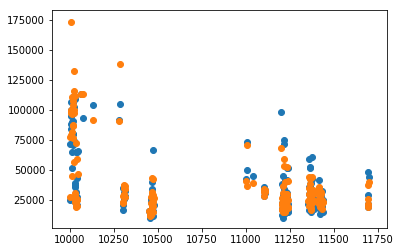

In [345]:
plt.scatter(data4.Zipcode,data4.pred)
plt.scatter(data4.Zipcode,data4.IncomePerCapita)
plt.show()